In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import geopandas
import geoplot
import geoplot.crs as gcrs

import json
import seaborn as sns

In [3]:
yield_data = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\yield_modelling\\data\\hvstat_africa_data.csv')
yield_data = yield_data.loc[(yield_data['product'] == 'Maize')]
kenya_data = yield_data.loc[yield_data['country'] == 'Kenya']

In [4]:
#kenya_data.loc[kenya_data['season_name'] == 'Long']#dropna(subset = ['production'])

In [ ]:
yield_data = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\yield_modelling\\data\\adm_crop_data_raw_KE.csv')
yield_data = yield_data.loc[(yield_data['product'] == 'Maize Grain (Fresh)') | (yield_data['product'] == 'Maize Grain (White)')]
yield_data = yield_data.loc[yield_data['data_usage_policy'] == 'Public']
#yield_data = yield_data.loc[(yield_data['indicator'] == 'Yield') | (yield_data['indicator'] == 'Quantity Produced')]
#yield_data = yield_data.loc[(yield_data['indicator'] == 'Quantity Produced')]
yield_data = yield_data.drop(['status_changed', 'collection_status_changed', 'Unnamed: 0','created', 'modified'], axis=1)
publication_columns = ['source_document', 'publication_name', 'dataseries', 'dataseries_name', 'collection_date']
moot_cols = ['geographic_group', 'fewsnet_region',
             'country', 'country_code', 'admin_0', 'admin_3', 'admin_4', 
             'specialization_type', 'dataseries_specialization_type',
            'collection_status', 
            'source_organization', 
            'document_type', 'preference_rating', 'indicator_group', 'status', 
            'collection_schedule', 
            'data_usage_policy', 'submitted_by', 'planting_start_date', 
            'planting_end_date', 'harvest_start_date', 'harvest_end_date', 
            'vegetative_start_date', 'vegetative_end_date', 'reproductive_start_date', 
            'reproductive_end_date', 'datasourcedocument', 'datasourceorganization',
            'population_group', 'crop_production_system',
            'season_name', 'season_type']
unsure_cols = ['cpcv2', 'cpcv2_description', 'datacollectionperiod', 'datacollection',
               'indicator_abbreviation', 'locality', 'season', 'dataseries']
yield_data = yield_data.drop(moot_cols + publication_columns + unsure_cols, axis=1)
for date_col in ['start_date', 'period_date', 'season_date']:
    yield_data.loc[:, date_col] = pd.to_datetime(yield_data.loc[:, date_col])

C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_6020\4238206181.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  yield_data = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\yield_modelling\\data\\adm_crop_data_raw_KE.csv')


In [22]:
#yield_data#['start_date'].unique()

In [57]:
#fig, ax = plt.subplots()
#sns.barplot(data = yield_data, x = 'admin_1', y='value', estimator = 'mean', errorbar = 'sd', ax=ax)
#ax.tick_params(axis='x', labelrotation=90)

In [4]:
adm_data = geopandas.read_file('C:\\Users\\wlwc1989\\Documents\\yield_modelling\\data\\KE_boundaries\\adm_boundaries.geojson')
adm_data.drop(columns = ['end_date', 'country_code', 
                         'fewsnet_region', 'geographic_group', 
                         'es_name', 'fr_name', 'pt_name',
                         'ar_name', 'country', 'admin_0',
                         'admin_3', 'admin_4', 'layer_id',
                         'geographicunitsetversion_name', 'zone_type', 'urban_rural', 'start_month',
                         ], inplace=True)
adm_data = adm_data.explode()#.crs
adm_data.loc[:, 'centroid'] = adm_data.loc[:, 'geometry'].to_crs(crs=3857).centroid.to_crs('EPSG:4326')
adm_data_for_merging = adm_data.drop_duplicates(subset = ['fnid']).drop(columns=['admin_1', 'admin_2', 'start_date', 'id'])
yield_data_polygons = adm_data_for_merging.merge(yield_data, on=['fnid'], how='right')#yield_data.merge(, on=['fnid'], how='left')#, validate='one_to_many')

Skipping field centroid: unsupported OGR type: 3


In [21]:
#yield_data_mean = yield_data.loc[(yield_data['indicator'] == 'Yield')]
#yield_data_mean = yield_data_mean.loc[:, ['geographic_unit_name', 'value']].groupby('geographic_unit_name').mean()
#yield_data_mean = adm_data_for_merging.merge(yield_data_mean, left_on=['name'], right_on = ['geographic_unit_name'], how='right')

#yield_data_std = yield_data.loc[(yield_data['indicator'] == 'Yield')]
#yield_data_std = yield_data_std.loc[:, ['geographic_unit_name', 'value']].groupby('geographic_unit_name').std()
#yield_data_std = adm_data_for_merging.merge(yield_data_std, left_on=['name'], right_on = ['geographic_unit_name'], how='right')

In [ ]:
len(yield_data_mean)

55

In [20]:
#yield_data#['indicator'].unique()

In [6]:
#yield_data_polygons = yield_data_polygons.loc[(yield_data_polygons['indicator'] == 'Yield')]# | (yield_data_polygons['indicator'] == 'Quantity Produced')]

In [7]:
#yield_data_polygons.columns.to_list()

In [19]:
#for year in range(1975, 2025):
#    obsnum = len(yield_data_polygons.loc[yield_data_polygons['season_year'] == f'Annual harvest {year}'])
#    print(f'Year {year}: {obsnum}')
#for_plotting = yield_data_polygons.loc[yield_data_polygons['season_year'] == 'Annual harvest 2020']#.columns.to_list()
#geoplot.polyplot(for_plotting)
#fig, ax = plt.subplots()
#yield_plot = geoplot.choropleth(for_plotting, hue='value', cmap='Oranges', ax=ax, legend=True)
#plt.colorbar(yield_plot)

In [18]:
#yield_data_mean.head()#.columns.to_list()#['name']

In [29]:
#fig, axs = plt.subplots(1, 2)
#norm = mpl.colors.Normalize(vmin=0.,vmax=3.5)
#geoplot.choropleth(yield_data_mean.dropna(), hue='value', cmap='Oranges', ax=axs[0], legend=True, norm=norm, legend_kwargs={'fraction': 0.05})
#norm = mpl.colors.Normalize(vmin=0.,vmax=1)
#geoplot.choropleth(yield_data_std.dropna(), hue='value', cmap='Blues', ax=axs[1], legend=True, norm=norm, legend_kwargs={'fraction': 0.05})

In [24]:
#yield_data_polygons.columns.to_list()

In [ ]:
adm1 = ['Isiolo', 'Turkana', 'Marsabit', 'Wajir', 'Mandera', 'Garissa']

In [1]:
yield_data_polygons.columns.to_list()

NameError: name 'yield_data_polygons' is not defined

In [ ]:
mean_yields = yield_data_polygons[['admin_1', 'geometry', 'yield']].dissolve(by = 'admin_1', aggfunc='mean').reset_index()
mean_prod = yield_data_polygons[['admin_1', 'geometry', 'production']].dissolve(by = 'admin_1', aggfunc='mean').reset_index()

In [63]:
mean_prod = mean_prod.explode()
mean_yields = mean_yields.explode()

In [64]:
mean_prod.loc[:, 'centroid'] = mean_prod.loc[:, 'geometry'].to_crs(crs=3857).centroid.to_crs('EPSG:4326')

In [65]:
mean_prod.set_geometry('centroid', inplace=True)

In [68]:
empty_point = mean_prod['centroid'].unique()[0]
mean_prod = mean_prod.loc[mean_prod['centroid'] != empty_point]

<Axes: >

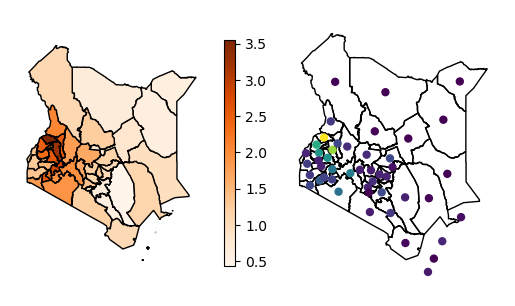

In [72]:
fig, axs = plt.subplots(1, 2)
#norm = mpl.colors.Normalize(vmin=0.,vmax=3.5)
geoplot.choropleth(mean_yields.dropna().explode(), hue='yield', cmap='Oranges', ax=axs[0], legend=True, legend_kwargs={'fraction': 0.05})
#norm = mpl.colors.Normalize(vmin=0.,vmax=1)
#geoplot.choropleth(mean_prod.dropna().explode(), hue='production', cmap='Blues', ax=axs[1], legend=True, legend_kwargs={'fraction': 0.05})
#geoplot.cartogram(mean_prod.dropna().explode(), scale='production', ax=axs[1])
mean_prod.set_geometry('centroid', inplace=True)
geoplot.pointplot(mean_prod.dropna(), hue='production', ax=axs[1])#, legend=True, legend_kwargs={'fraction': 0.05}, cmap='Blues', scale='production', limits=(0, None))
mean_prod.set_geometry('geometry', inplace=True)
geoplot.polyplot(mean_prod.explode(), ax=axs[1])

In [25]:
#for_plotting['value']

In [26]:
#adm_data.apply(lambda srs: eval(srs[13])['FNID'], axis = 1)#.iloc[0, 13]['attributes']['FNID']

In [27]:
#geom = adm_data.pop('geometry')
#geom = geom.apply(lambda x: list(x) if isinstance(x, geopandas.MultiPolygon) else x).explode()
#adm_data = adm_data.join(geom, how='inner')

In [97]:
#yield_data[['admin_2', 'value']].groupby('admin_2').std()

In [28]:
#sns.barplot(yield_data.groupby('fnid'))